**Análisis inicial**

In [1]:
#librerías
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [2]:
#fuente general de los gráficos
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
random.seed(261125)   # semilla para repoducibilidad

In [4]:
filmes = pd.read_excel("base_combinada.xlsx")
print(filmes)

                            title  vote_average  vote_count     revenue  \
0                       Inception         8.364       34495   825532764   
1                    Interstellar         8.417       32571   701729206   
2                 The Dark Knight         8.512       30619  1004558444   
3                          Avatar         7.573       29815  2923706026   
4                    The Avengers         7.710       29166  1518815515   
...                           ...           ...         ...         ...   
9947                     La Bruja         0.000           0           0   
9948                   Budiž voda         0.000           0           0   
9949                       IJswee         0.000           0           0   
9950                    Anonymous         0.000           0           0   
9951  If a Tree Falls in a Forest         0.000           0           0   

         budget  popularity  runtime  \
0     160000000      83.952      148   
1     165000000    

In [5]:
filmes.isna().sum() #revisar si hay valores perdidos

title             0
vote_average      0
vote_count        0
revenue           0
budget            0
popularity        0
runtime           0
genre             0
language          0
country         169
dtype: int64

In [6]:
filmes['country'] = filmes['country'].fillna("Desconocido")

In [7]:
filmes.isna().sum() #revisar que se haya hecho el cambio

title           0
vote_average    0
vote_count      0
revenue         0
budget          0
popularity      0
runtime         0
genre           0
language        0
country         0
dtype: int64

In [8]:
filmes['revenue_mill'] = filmes['revenue'] / 1_000_000
filmes['budget_mill'] = filmes['budget'] / 1_000_000 #a millones de dólares para facilitar la interpretación

In [10]:
filmes.describe().T #descriptivos para todas las variables numéricas

,count,mean,std,min,25%,50%,75%,max
vote_average,9952.0,6.416675e+00,1.131423e+00,0.0,5.90175,6.514000e+00,7.122000e+00,1.000000e+01
vote_count,9952.0,1.624812e+03,2.951101e+03,0.0,177.00000,5.765000e+02,1.649250e+03,3.449500e+04
revenue,9952.0,6.093559e+07,1.552992e+08,0.0,0.00000,2.455429e+06,5.103547e+07,2.923706e+09
budget,9952.0,2.001634e+07,3.923509e+07,0.0,0.00000,2.000000e+06,2.368371e+07,6.000000e+08
popularity,9952.0,1.998946e+01,2.579506e+01,0.6,10.89800,1.556700e+01,2.255175e+01,1.175267e+03
runtime,9952.0,1.001801e+02,2.653072e+01,0.0,90.00000,1.000000e+02,1.130000e+02,4.000000e+02
revenue_mill,9952.0,6.093559e+01,1.552992e+02,0.0,0.00000,2.455429e+00,5.103547e+01,2.923706e+03
budget_mill,9952.0,2.001634e+01,3.923509e+01,0.0,0.00000,2.000000e+00,2.368371e+01,6.000000e+02


In [12]:
filmes[filmes['runtime'] == 0][['title', 'runtime']] #niguna duración puede ser 0

,title,runtime
7919,Los verduleros,0
8572,Offline - Das Leben ist kein Bonuslevel,0
8665,El fantasma de mi novia,0
8823,García Y García,0
8830,Los verduleros 2,0
...,...,...
9934,Chucky Boy Blue,0
9935,Shang Shan,0
9938,Untitled Peaky Blinders Film,0
9941,Sábado no mato,0


In [13]:
filmes[filmes['budget'] == 0][['title', 'budget']] #nigun presupuesto puede ser 0

,title,budget
256,君の名は。,0
368,365 dni,0
388,To All the Boys I've Loved Before,0
501,The Kissing Booth,0
639,"Love, Rosie",0
...,...,...
9944,Charles,0
9945,O Nascimento de Helena,0
9946,モーレツ!透明変態人間 透け透けミラクル☆エロス,0
9948,Budiž voda,0


In [14]:
filmes['runtime'] = filmes['runtime'].replace(0, np.nan)
filmes['budget'] = filmes['budget'].replace(0, np.nan) #ajustes lógicos:

filmes['budget_mill'] = filmes['budget'] / 1_000_000 #recalculo

In [15]:
filmes.isna().sum() # registro adecuado de los NA

title              0
vote_average       0
vote_count         0
revenue            0
budget          4471
popularity         0
runtime          107
genre              0
language           0
country            0
revenue_mill       0
budget_mill     4471
dtype: int64

In [16]:
filmes[['vote_average','vote_count','revenue_mill','budget_mill',
        'popularity','runtime']].describe().round(2).T #tabla resumen simplificada final

,count,mean,std,min,25%,50%,75%,max
vote_average,9952.0,6.42,1.13,0.0,5.9,6.51,7.12,10.00
vote_count,9952.0,1624.81,2951.10,0.0,177.0,576.50,1649.25,34495.00
revenue_mill,9952.0,60.94,155.30,0.0,0.0,2.46,51.04,2923.71
budget_mill,5481.0,36.34,46.92,0.0,7.0,20.00,45.00,600.00
popularity,9952.0,19.99,25.80,0.6,10.9,15.57,22.55,1175.27
runtime,9845.0,101.27,24.52,2.0,90.0,100.00,113.00,400.00


In [17]:
genre_adj = filmes["genre"].str.split(",").apply(lambda x: [g.strip() for g in x if g.strip()]) #separa los elementos de la lista

#selecciona un genero de los listados al azar y lo coloca en una nueva variable

filmes["genre_random"] = genre_adj.apply(lambda x: random.choice(x) if len(x) > 0 else np.nan) #selecciona un genero

filmes[["genre", "genre_random"]].head() #comprobar

,genre,genre_random
0,"['Action', 'Science Fiction', 'Adventure']",'Adventure']
1,"['Adventure', 'Drama', 'Science Fiction']",'Drama'
2,"['Drama', 'Action', 'Crime', 'Thriller']",'Thriller']
3,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",'Fantasy'
4,"['Science Fiction', 'Action', 'Adventure']",'Action'


In [18]:
country_adj = filmes["country"].str.split(",").apply(lambda x: [g.strip() for g in x if g.strip()]) #separa los elementos de la lista

#selecciona un país de los listados al azar y lo coloca en una nueva variable

filmes["country_random"] = country_adj.apply(lambda x: random.choice(x) if len(x) > 0 else np.nan) #selecciona un país

filmes[["country", "country_random"]].head() #comprobar

,country,country_random
0,"United Kingdom, United States of America",United Kingdom
1,"United Kingdom, United States of America",United States of America
2,"United Kingdom, United States of America",United Kingdom
3,"United States of America, United Kingdom",United States of America
4,United States of America,United States of America


In [19]:
filmes["language"].unique() #analizar los levels
filmes["language"].value_counts() #y su tamaño

language
en    7739
ja     604
es     417
fr     296
ko     137
it     106
zh     102
de      83
cn      82
ru      68
pt      54
hi      31
da      30
no      25
sv      24
nl      19
pl      19
id      17
th      15
tr       9
he       9
fi       7
uk       6
cs       5
fa       5
sr       4
hu       4
te       3
el       3
tl       3
lv       3
ro       2
ms       2
ta       2
eu       2
ar       2
is       2
ur       1
be       1
sk       1
xx       1
ca       1
la       1
bn       1
ml       1
nb       1
km       1
ka       1
Name: count, dtype: int64

In [20]:
# recodificar las etiquetas de idioma en un diccionario, se dejaron los más frecuentes
language_full_sp = {
    "en": "Inglés",
    "ja": "Japonés",
    "es": "Español",
    "fr": "Francés",
    "ko": "Coreano",
    "it": "Italiano",
    "zh": "Chino",
}

# crear una nueva variable

filmes["language_adj"] = filmes["language"].apply( 
    lambda x: language_full_sp[x] if x in language_full_sp else "Otro"
)

filmes["language_adj"].value_counts()

language_adj
Inglés      7739
Japonés      604
Otro         551
Español      417
Francés      296
Coreano      137
Italiano     106
Chino        102
Name: count, dtype: int64

In [21]:
filmes["genre_random"].unique() #analizar los levels

array(["'Adventure']", "'Drama'", "'Thriller']", "'Fantasy'", "'Action'",
       "['Action'", "['Drama']", "['Thriller'", "'Fantasy']",
       "'Western']", "'Crime']", "['Adventure'", "'Science Fiction']",
       "['Drama'", "['Crime'", "'Mystery']", "'Adventure'", "'Thriller'",
       "'Science Fiction'", "'Crime'", "'Family']", "['Fantasy'",
       "'Family'", "['Horror'", "'Animation'", "['Mystery'", "['Family'",
       "'Drama']", "['Comedy'", "['History'", "['Comedy']",
       "['Animation'", "'Comedy'", "['War'", "'Action']", "'Comedy']",
       "'War']", "'History'", "['Science Fiction'", "['Romance'",
       "'Romance'", "'Romance']", "'History']", "'War'",
       "['Science Fiction']", "'Mystery'", "'Animation']", "['Western']",
       "['Horror']", "'Horror'", "['Action']", "'Music'", "'Horror']",
       "'Music']", "['Adventure']", "['Western'", "['Fantasy']",
       "['Thriller']", "['Music'", "['War']", "['Romance']", "'TV Movie'",
       "'Documentary'", "['Documentary']

In [23]:
def limpiar_genero(x): #función para limpiar los géneros
    # quitar corchetes y comillas
    x = x.replace("[", "").replace("]", "")
    x = x.replace("'", "").replace('"', "")
    
    # limpiar espacios sobrantes
    x = x.strip()
    
    # dividir en lista de géneros
    generos = [g.strip() for g in x.split(",") if g.strip() != ""]

   #el caso  '[]' queda vacío, entonces NA
    
    if len(generos) == 0:
        return np.nan
    
    # seleccionar género aleatorio
    return random.choice(generos)

# modificar el género
filmes["genre_random"] = filmes["genre"].apply(limpiar_genero)

In [24]:
filmes["genre_random"].unique() #comprobar la limpieza

array(['Adventure', 'Drama', 'Action', 'Comedy', 'Science Fiction',
       'Thriller', 'Romance', 'Fantasy', 'Crime', 'Animation', 'Family',
       'Horror', 'Mystery', 'Western', 'War', 'Music', 'History',
       'TV Movie', 'Documentary', nan], dtype=object)

In [25]:
filmes["genre_random"] = filmes["genre_random"].replace("nan", np.nan) #ajustar limpieza final

In [26]:
#cambiar los géneros a español para los gráficos
generos_sp = {
    "Adventure": "Aventura",
    "Drama": "Drama",
    "Action": "Acción",
    "Comedy": "Comedia",
    "Science Fiction": "Ciencia Ficción",
    "Thriller": "Suspenso",
    "Romance": "Romance",
    "Fantasy": "Fantasía",
    "Crime": "Crimen",
    "Animation": "Animación",
    "Family": "Familiar",
    "Horror": "Terror",
    "Mystery": "Misterio",
    "Western": "Vaqueros",
    "War": "Bélicas",
    "Music": "Musicales",
    "History": "Historia",
    "TV Movie": "Película de TV",
    "Documentary": "Documental"
}


# ajustar la variable
filmes["genre_random"] = filmes["genre_random"].map(generos_sp)

In [27]:
filmes["country_random"].unique() #analizar los levels

array(['United Kingdom', 'United States of America', 'New Zealand',
       'South Africa', 'South Korea', 'France', 'Japan', 'Canada',
       'China', 'Malta', 'Germany', 'Bulgaria', 'Mexico', 'Italy',
       'Spain', 'Hong Kong', 'United Arab Emirates', 'Switzerland',
       'Czech Republic', 'Ireland', 'Poland', 'India', 'Australia',
       'Russia', 'Sweden', 'Belgium', 'Desconocido', 'Denmark', 'Iceland',
       'Brazil', 'Turkey', 'Hungary', 'Norway', 'Morocco', 'Indonesia',
       'Netherlands', 'Israel', 'Dominican Republic', 'Argentina',
       'Greece', 'Colombia', 'Soviet Union', 'Romania', 'Serbia',
       'Austria', 'Paraguay', 'Thailand', 'Cyprus', 'Malawi',
       'Luxembourg', 'Peru', 'Portugal', 'Singapore', 'Iran', 'Taiwan',
       'Macao', 'Chile', 'Vietnam', 'Cambodia', 'Puerto Rico', 'Finland',
       'Panama', 'Ukraine', 'Belarus', 'Bolivia', 'Aruba', 'Albania',
       'East Germany', 'Jamaica', 'Philippines', 'Lithuania', 'Nigeria',
       'Egypt', 'Mauritius', 'L

In [30]:
asignar_continentes = {

    # américa
    "United States of America": "América",
    "Canada": "América",
    "Mexico": "América",
    "Dominican Republic": "América",
    "Brazil": "América",
    "Argentina": "América",
    "Colombia": "América",
    "Peru": "América",
    "Chile": "América",
    "Paraguay": "América",
    "Uruguay": "América",
    "Bolivia": "América",
    "Costa Rica": "América",
    "Honduras": "América",
    "Panama": "América",
    "Puerto Rico": "América",
    "Jamaica": "América",
    "Cuba": "América",
    "Venezuela": "América",
    "Aruba": "América",

    # europa
    "United Kingdom": "Europa",
    "Ireland": "Europa",
    "France": "Europa",
    "Germany": "Europa",
    "East Germany": "Europa",
    "Malta": "Europa",
    "Italy": "Europa",
    "Spain": "Europa",
    "Switzerland": "Europa",
    "Czech Republic": "Europa",
    "Poland": "Europa",
    "Sweden": "Europa",
    "Belgium": "Europa",
    "Denmark": "Europa",
    "Iceland": "Europa",
    "Netherlands": "Europa",
    "Russia": "Europa",
    "Soviet Union": "Europa",
    "Hungary": "Europa",
    "Norway": "Europa",
    "Greece": "Europa",
    "Romania": "Europa",
    "Serbia": "Europa",
    "Austria": "Europa",
    "Luxembourg": "Europa",
    "Portugal": "Europa",
    "Albania": "Europa",
    "Lithuania": "Europa",
    "Latvia": "Europa",
    "Estonia": "Europa",
    "Slovakia": "Europa",
    "Belarus": "Europa",
    "Georgia": "Europa",
    "Andorra": "Europa",

    # Asia
    "South Korea": "Asia",
    "Japan": "Asia",
    "China": "Asia",
    "Hong Kong": "Asia",
    "Taiwan": "Asia",
    "India": "Asia",
    "Israel": "Asia",
    "Turkey": "Asia",
    "Indonesia": "Asia",
    "Thailand": "Asia",
    "Singapore": "Asia",
    "Iran": "Asia",
    "Vietnam": "Asia",
    "Philippines": "Asia",
    "Malaysia": "Asia",
    "Macao": "Asia",
    "Cambodia": "Asia",
    "Sri Lanka": "Asia",
    "Azerbaijan": "Asia",
    "Cyprus": "Asia",

    # áfrica
    "South Africa": "África",
    "Morocco": "África",
    "Nigeria": "África",
    "Egypt": "África",
    "Mauritius": "África",
    "Malawi": "África",
    "Niger": "África",

    # Oceanía
    "Australia": "Oceanía",
    "New Zealand": "Oceanía",

    # desconocido
    "Desconocido": "Desconocido"
}

# Crear  nueva variable
filmes["country_continent"] = filmes["country_random"].apply(
    lambda x: asignar_continentes.get(x) if pd.notna(x) else np.nan
)

filmes[["country", "country_random", "country_continent"]].head()


,country,country_random,country_continent
0,"United Kingdom, United States of America",United Kingdom,Europa
1,"United Kingdom, United States of America",United States of America,América
2,"United Kingdom, United States of America",United Kingdom,Europa
3,"United States of America, United Kingdom",United States of America,América
4,United States of America,United States of America,América


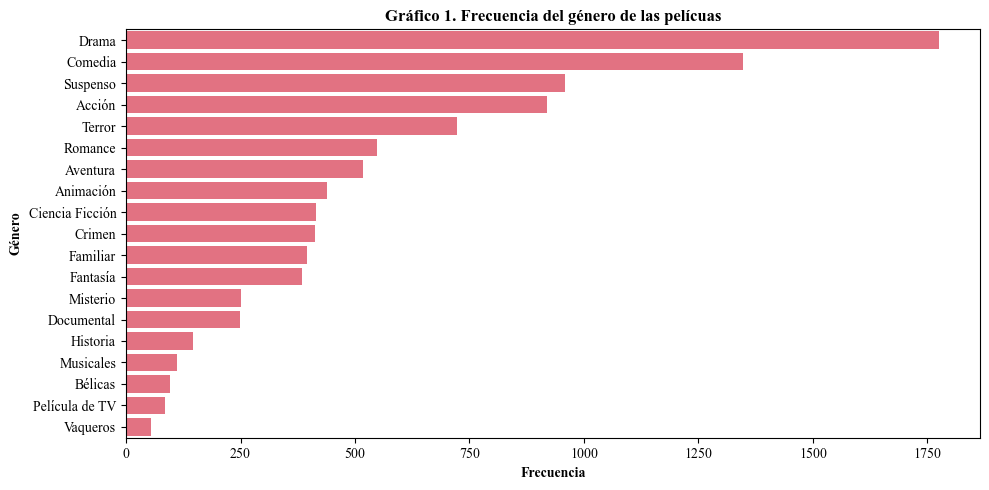

In [31]:
plt.figure(figsize=(10, 5))

sns.countplot( #barras
    data=filmes,
    y="genre_random", #y por el tamaño de las categorías
    order=filmes["genre_random"].value_counts().index, #descendente
    color="#f55f74" 
)

plt.title("Gráfico 1. Frecuencia del género de las pelícuas", fontsize=12, fontweight="bold")
plt.xlabel("Frecuencia", fontweight="bold")
plt.ylabel("Género", fontweight="bold")
plt.tight_layout() #asegura el ajuste

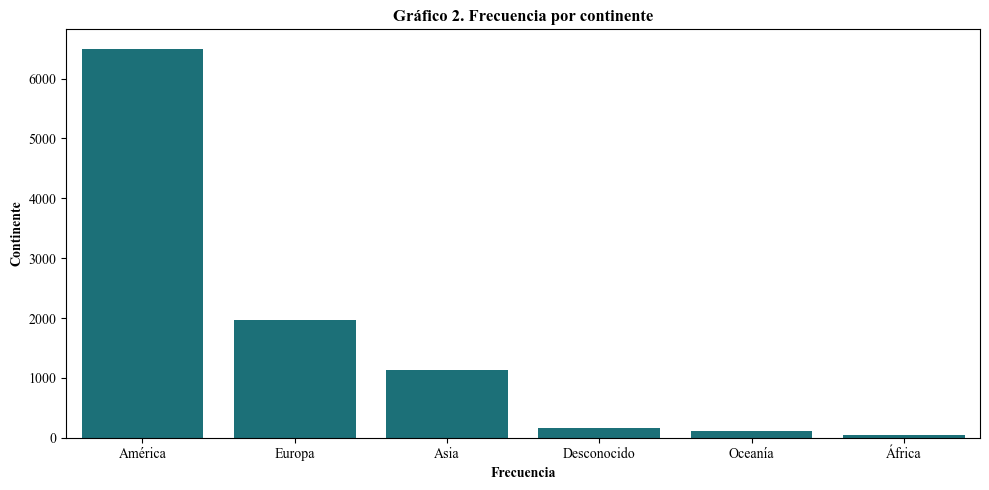

In [32]:
plt.figure(figsize=(10, 5))

sns.countplot(
    data=filmes,
    x="country_continent",
    order=filmes["country_continent"].value_counts().index,
    color="#0d7d87"
)

plt.title("Gráfico 2. Frecuencia por continente", fontsize=12, fontweight="bold")
plt.xlabel("Frecuencia", fontweight="bold")
plt.ylabel("Continente", fontweight="bold")
plt.tight_layout()

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

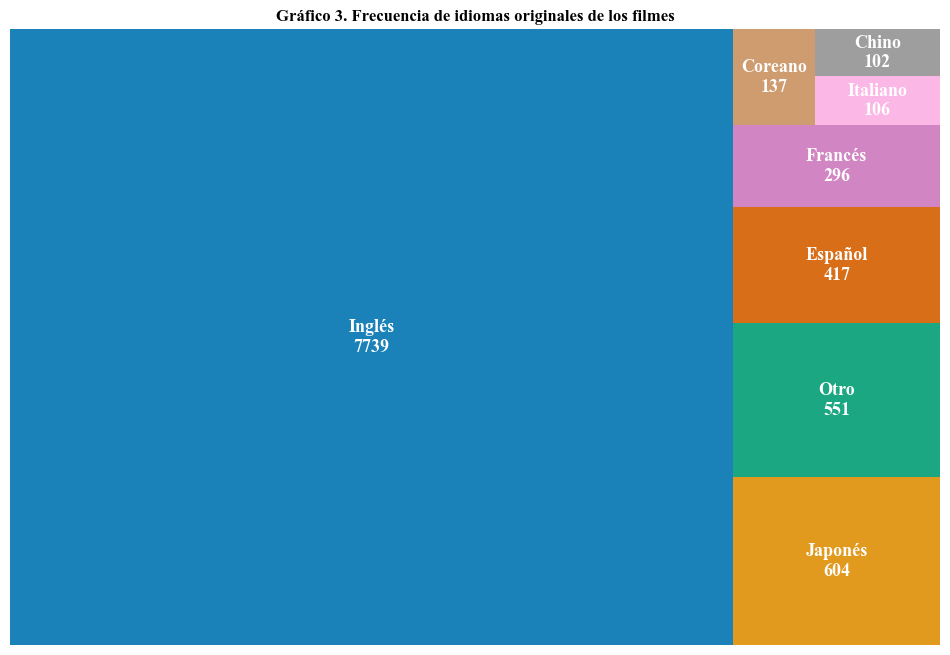

In [35]:
# frecuencias
freq = filmes["language_adj"].value_counts()

# etiquetas (idioma + conteo puntual)
labels = [f"{lang}\n{count}" for lang, count in zip(freq.index, freq.values)]

# paleta de colores
palette = sns.color_palette("colorblind", n_colors=len(freq))

plt.figure(figsize=(12, 8))

squarify.plot( #mapra jeráquico / treemap. altenativa legible al piechart
    sizes=freq.values,
    label=labels,          
    color=palette,
    alpha=0.9,
    text_kwargs={
        'fontsize': 13,
        'color': 'white',      
        'fontweight': 'bold'   
    }
)

plt.title("Gráfico 3. Frecuencia de idiomas originales de los filmes", fontsize=12, fontweight="bold")
plt.axis("off")

In [36]:
filmes.to_excel("base_ajustada.xlsx", index=False) #para guardar otra base con los ajustes hechos